In [1]:
import torch # pytorch

## O que é um TENSOR?
### em termos gerais é uma generalização de escalares, vetores e matrizes, podendo nos casos multidimensionais possuir qualquer dimensão. Frameworks como PyTorch, TensorFlow, MindSpore etc. usam estas estruturas de dados como entradas, as manipula, e gera a saída como tensores. Manipulam apenas números e possuem funções para transformações algébricas, tal como arrays NumPy
<img src='img\1_rLcM-j8b61Xlfk81k_exKw.png'>

### Tensor: em um espaço de dimensão $m$, um tensor de rank (posto) $n$ é um objeto matemático que tem $n$ índices, $m^n$ componentes, e obedece certas regras de transformação. No caso escalar tem-se $1$ componente, pois há $n=0$ vetores base por componente, logo $m=1$ (ponto sobre uma reta) e $1^0=1$ componente e rank = $0$.

In [22]:
escalar = torch.tensor(6)
print(escalar)
import numpy as np
escalar_np = np.array(6)
print(escalar_np.ndim) # Dimensão 0 (eixos = 0 ou seja, sem vetores base)

tensor(6)
torch.Size([])
0


### Suponha um sistema de coordenadas 3D com eixos x, y e z, com cada eixo com um vetor unitário (ou seja, de amplitude $1$, denominados $\hat{i},\hat{j},\hat{k}$. Imagine na figura abaixo um vetor físico resultante $\vec{v}$ com a soma $\vec{v}=3\hat{i}+2\hat{j}+3\hat{z}$. Consegue visualizar $\vec{v}$ na figura?
<img src='img\axis_tensor.jpg'>.


<img src='img\Spherical-coordinate-system.png'>

### Neste caso temos dimensão $m=3$ com $1$ vetor base por componente. $3^1=3$ componentes. Este $n=1$ define o rank=$1$, que coincide com o conceito de dimensão do array NumPy, enquanto aqui dimensão é o número de eixos para representar a grandeza

In [24]:
vetor = torch.tensor([-1.9, 12, 0.5])
print(vetor)
print(vetor.size()) # size() no pytorch equivale ao shape do numpy
vetor_np = np.array([-1.9,12,0.45])
print(vetor_np)
print(vetor_np.ndim)

tensor([-1.9000, 12.0000,  0.5000])
torch.Size([3])
[-1.9  12.    0.45]
1


### Como podemos descrever as forças atuantes em um ponto no interior deste bloco? (considere que este bloco é parte de uma estrutura qualquer, metálica, concreto etc.). Seja a notação $\sigma_{ab}$, onde $b$ é o eixo perpendicular à face em questão e $a$ é a direção da força atuante. $e_1,e_2,e_3$ são os vetores unitários perpendiculares a cada face. Considere $x=1,y=2,z=3$
<img src='img\Components_stress_tensor.svg.png'>

### Temos então um Tensor $T$, que pode ser escrito matricialmente como: $T=\left[ \begin{array}{ccc} \sigma_{xx} & \sigma_{yx} & \sigma_{zx} \\ \sigma_{xy} & \sigma_{yy} & \sigma_{zy} \\ \sigma_{xz} & \sigma_{yz} & \sigma_{zz} \end{array} \right]$, ou seja, $m=3$ com $n=2$ vetores base por componente, logo $m^n=3^2=9$ componentes e o rank do tensor T é igual a $2$. Como tem o formato matricial, justifica-se dizer que a matriz é por padrão bidimensional, como se fosse um tensor de rank 2, mas é apenas um array de números. É incorreto dizer que tensor=matriz, pois o tensor necessita da especificação mais detalhada (vetores base), possui conotação física e propriedades como invariância às mudanças de sistemas de coordenadas

In [25]:
matriz = torch.tensor([[1, 2], [3, 4]])
print(matriz)
print(matriz.size())

matriz_np = np.array([[1, 2], [3, 4]])
print(matriz_np)
print(matriz_np.ndim)

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])
[[1 2]
 [3 4]]
2


### O que seria então um tensor de rank$=3$? como um empilhamento de matrizes!, com $3^3=27$ componentes e assim por diante
### <img src='img\rank3.png'>

In [33]:
matriz_3d = torch.tensor([[[1,2],[3,4],[5,6], [7,8]]])
print(matriz_3d)
print(matriz_3d.size())
matriz_3d = np.array([[[1,2],[3,4],[5,6], [7,8]]])
print(matriz_3d[0][1][0])
print(matriz_3d)
print(matriz_3d.ndim)

tensor([[[1, 2],
         [3, 4],
         [5, 6],
         [7, 8]]])
torch.Size([1, 4, 2])
3
[[[1 2]
  [3 4]
  [5 6]
  [7 8]]]
3


### Consegue ver relação com os canais RGB e representação de imagens? Em aprendizagem de máquina tensores e suas operações, como decomposições etc. são muito importantes para lidar com dados de alta dimensão, por exemplo em redes neurais, a base do deep learning
<img src='img\rgb3d.png'> 

### Várias operações matemáticas são realizadas com os tensores, como aritmética, produto escalar, produto interno, produto vetorial etc.

a+b: tensor([5, 7, 9])
a*b: tensor([ 4, 10, 18])
A*B:  tensor([[1, 0],
        [9, 4]])
Multiplicacao de A por B: tensor([[ 7,  2],
        [15,  4]])
k*A: tensor([[2, 4],
        [6, 8]])
A**B:  tensor([[ 1,  1],
        [27,  4]])
tensor(32)


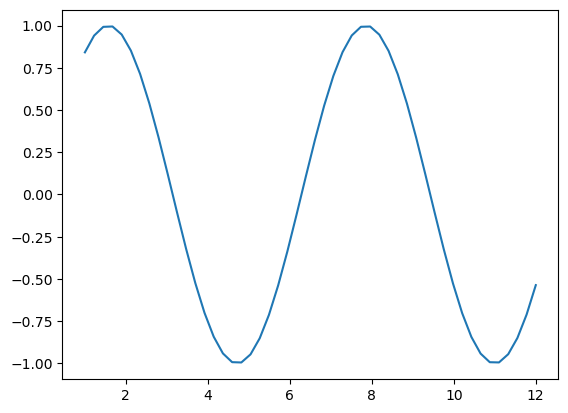

In [35]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
print('a+b:',a+b)
print('a*b:',a*b) #multiplicações ponto a ponto

A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[1, 0], [3, 1]])
print('A*B: ',A*B)

print('Multiplicacao de A por B:',A.matmul(B))

k = 2
print('k*A:', k*A)

print('A**B: ',A**B)

#produto interno entre vetores
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
print(torch.dot(a,b))

import matplotlib.pyplot as plt
 
# criar tensor linearmente espaçado entre 1 e 12
x = torch.linspace(1, 12, 50)
 
# aplicar função seno
y = torch.sin(x)
 
# plot convertendo os tensores para arrays numpy para ser compatível com matplotlib
plt.plot(x.numpy(), y.numpy())
 
# display
plt.show()

### No contexto de machine learning, além de algebra, derivações, integrais e cálculos de gradiente são muito importantes e a base de vários algoritmos de aprendizagem/otimização

In [20]:
def f(z):
    return z**2 - 3*x + 5

x = torch.tensor(5.0, requires_grad=True) #seta opção de que x será usado em cálculos de gradiente
y = f(x)

y.backward() # calcula derivada de f em relação a x (void)
gradiente = x.grad
print('derivada f(x) para x=5.0', gradiente)


derivada f(x) para x=5.0 tensor(7.)


In [34]:
#derivada parcial (o gradiente para mais de uma variável é o vetor de derivadas parciais, ou seja, como uma função varia em cada direção)
def g(x,y):
    return x**2 + y**3

x = torch.tensor(5.0, requires_grad=True) #seta opção de que x será usado em cálculos de gradiente
y = torch.tensor(2.0, requires_grad=True) #seta opção de que y será usado em cálculos de gradiente

z = g(x,y)
z.backward() # calcula derivada de g em relação a x e a y (void)
gradiente_x = x.grad
gradiente_y = y.grad
print('derivada g(x,y) para x=5.0 e y=2.0', gradiente_x, gradiente_y)


derivada g(x,y) para x=5.0 e y=2.0 tensor(10.) tensor(12.)


### Entendido o conceito e operações básicas com tensores, vamos implementar uma rede neural Perceptron Multicamadas para classificar as imagens do MNIST, para ter uma base de como é o fluxo com o PyTorch. De maneira similar, pode-se ver o mesmo exemplo MNIST com o TensorFlow

In [2]:
#!pip install torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

#### Download do MNIST com composição de transformações

In [3]:
transform_ = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))]) # padroniza z-score

In [4]:
train_dataset = MNIST(root='./data', train=True, transform=transform_, download=True)

In [18]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [6]:
import matplotlib.pyplot as plt
sample_digit = 10
sample_image, sample_label = train_dataset[sample_digit]

# não plota imagem como tensor, então é preciso retornar a numpy, despadronizando
sample_image = sample_image*0.5 + 0.5 # x = x_p * std + mean
sample_image = sample_image.numpy()
#print(sample_image)
#plt.imshow(sample_image.squeeze(), cmap='gray')
#plt.title(f'Label: {sample_label}')
#plt.axis('off')
#plt.show()

#### Vamos criar uma classe base Module, para instanciar Modelos

In [10]:
import torch

In [16]:
class MLP(torch.nn.Module):
    #construtor
    def __init__(self, input_size, hidden_sizes, output_size): #cada camada oculta com tamanho N (sizes)
        super(MLP, self).__init__() #chamar construtor da classe mãe
        
        # camadas ocultas
        self.layers = torch.nn.ModuleList() #lista de camadas
        in_size = input_size
        for hidden_size in hidden_sizes: #para cada tamanho de camada escondida (quantos neuronios por camada)
            self.layers.append(torch.nn.Linear(in_size, hidden_size)) # camada linear oculta Wx+b, recebe os neuronios da camada de entrada e os neuronios da escondida atual
            self.layers.append(torch.nn.ReLU()) #camadas de ativação
            #atualiza camadas - troca
            in_size = hidden_size # in_size guarda o tamanho da camada escondida atual, que será a camada de entrada na próxima iteração

        #camadas de saída
        self.output_layer = torch.nn.Linear(in_size, output_size)
        #esta rede está configurada para fazer regressão, pois não há função de ativação na camada de saída
        #embora possamos definir aqui, vamos deixar automático para a própria função de erro aplicar esta ativação para classificação
        #como são 10 classes, seria uma SOFTMAX e não a SIGMOIDE
        
    #propagar entradas
    def forward(self, x):
        for layer in self.layers:
            x = layer(x) # x é a entrada da camada atual que gera por sua vez a saída x, que será entrada da próxima camada e assim por diante...
        
        out = self.output_layer(x)
        return out





#### a rede Linear define a base das redes neurais 
$z=W_1x_1 + W_2x_2 + \cdots + W_kx_k$

#### Função de ativação reLU - unidade linear retificada

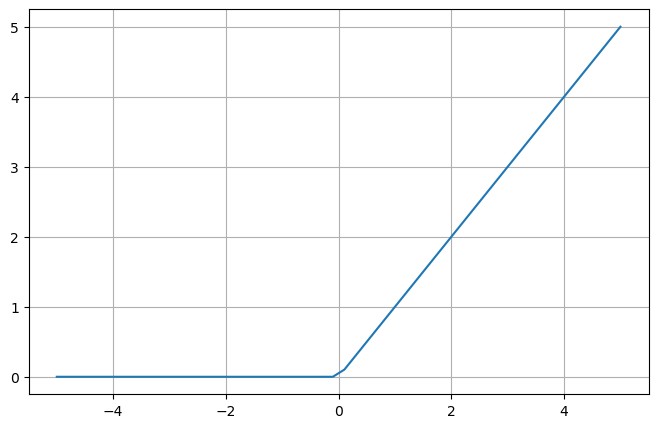

In [1]:
# ReLU in Python
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-5, 5, 50)
z = [max(0, i) for i in x]


plt.subplots(figsize=(8, 5))
plt.plot(x, z)
plt.grid()
plt.show()

In [ ]:
input_size = 784 # 28 x 28
output_size = 10 # 10 classes
#Hiperparametros
hidden_sizes = [256, 128] #2 ocultas

#Modelo
model = MLP(input_size, hidden_sizes, output_size)
print(model)

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
  )
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)


<img src='img\three_layer_neural_network_e50fa950bc.png'>

In [19]:
#Função de erro e otimizador
loss_function = torch.nn.CrossEntropyLoss()

#Otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #learning rate

#Loop de treinamento
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    total_loss = 0.0
    #loop de mini batches (batch de índice t (X^t, y^t))
    for x_t, y_t in train_loader:
        #zerar gradientes
        optimizer.zero_grad()
        #propagação das entradas
        x_t_flat = x_t.view(x_t.size(0),-1)
        yhat_t = model(x_t_flat)
        #erro
        loss = loss_function(yhat_t, y_t)
        #retropropagação (calcula os gradientes)
        loss.backward()
        # atualiza os pesos (ADAM, SGD etc.)
        optimizer.step() 
         #acumular erro dos mini batches
        total_loss += loss.item()
    # media dos erros dos mini batches para a época atual de treinamento
    average_loss = total_loss / len(train_loader)
    losses.append(average_loss)
    print(f'{epoch+1}/{num_epochs}, Loss: {average_loss}')


1/10, Loss: 0.34099251830152105
2/10, Loss: 0.1562988066853189
3/10, Loss: 0.11357907661949711
4/10, Loss: 0.09143496667499593
5/10, Loss: 0.07722001019909953
6/10, Loss: 0.06907576495316872
7/10, Loss: 0.05966669993873722
8/10, Loss: 0.0515244600259692
9/10, Loss: 0.04932654739985776
10/10, Loss: 0.041524353965291944
